# Python Data Analysis On Course Enrolment

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import glob
import seaborn as sns
from datetime import datetime

## Let's clean some data!

In [2]:
# Get path of all files
path_list = glob.glob("data/*/*.csv")

# Show first 10 items
path_list[:10]

['data\\01-01-2016\\ana.csv',
 'data\\01-01-2016\\ant.csv',
 'data\\01-01-2016\\asabs.csv',
 'data\\01-01-2016\\asi.csv',
 'data\\01-01-2016\\assem.csv',
 'data\\01-01-2016\\ast.csv',
 'data\\01-01-2016\\bch.csv',
 'data\\01-01-2016\\ceres.csv',
 'data\\01-01-2016\\chm.csv',
 'data\\01-01-2016\\cine.csv']

In [3]:
# How many CSV files are there?
len(path_list)

17850

In [4]:
# What's the first item in the list?
path_list[0]

'data\\01-01-2016\\ana.csv'

In [5]:
# Read the first item to show output structure
temp_df = pd.read_csv(path_list[0])
temp_df.head()

,Course,Section Code,Title(subtitle),Meeting Section,Wait List,Time,Location,Instructor,Enrolment Indicator,Enrolment Controls,Information Updated,Enrolment Caps,Enrolment #,WaitList #
0,ANA300Y1,Y,Human Anat Histol,L0101,Y,MT9,MS 2158,B. Ballyk,P,See Details,NaN,400.0,315.0,0.0
1,NaN,NaN,NaN,NaN,NaN,F10-12,MS 2158,B. Ballyk,NaN,NaN,NaN,NaN,NaN,NaN
2,ANA301H1,S,Human Embryology,L0101,Y,MF1-3,MS 2158,M. Bidmos,NaN,NaN,NaN,500.0,186.0,0.0
3,ANA400H1,S,Anatomy Dissections,L0101,N,TR1-3,NaN,M. Bidmos,E,NaN,NaN,NaN,20.0,0.0
4,ANA498Y1,Y,Research Project,L0101,N,TBA,NaN,H. Sun,E,NaN,NaN,NaN,24.0,0.0


In [6]:
# Lets merge all the CSV files into one.
# Since there is no way to distinguish the data of one course for different days, a new column must be added that
# displays the date that the data was fetch. This information is available through the path of the file.

In [7]:
# EXAMPLE:

# Add a date column to temp_df using the path.

# Start by getting the path
temp_path = path_list[0]
temp_path

'data\\01-01-2016\\ana.csv'

In [8]:
# Split using slash and get middle item (i.e. the date)
temp_date = temp_path.split('\\')[1]
temp_date

'01-01-2016'

In [9]:
# Add the date to the data path
temp_df['date'] = temp_date
temp_df.head()

,Course,Section Code,Title(subtitle),Meeting Section,Wait List,Time,Location,Instructor,Enrolment Indicator,Enrolment Controls,Information Updated,Enrolment Caps,Enrolment #,WaitList #,date
0,ANA300Y1,Y,Human Anat Histol,L0101,Y,MT9,MS 2158,B. Ballyk,P,See Details,NaN,400.0,315.0,0.0,01-01-2016
1,NaN,NaN,NaN,NaN,NaN,F10-12,MS 2158,B. Ballyk,NaN,NaN,NaN,NaN,NaN,NaN,01-01-2016
2,ANA301H1,S,Human Embryology,L0101,Y,MF1-3,MS 2158,M. Bidmos,NaN,NaN,NaN,500.0,186.0,0.0,01-01-2016
3,ANA400H1,S,Anatomy Dissections,L0101,N,TR1-3,NaN,M. Bidmos,E,NaN,NaN,NaN,20.0,0.0,01-01-2016
4,ANA498Y1,Y,Research Project,L0101,N,TBA,NaN,H. Sun,E,NaN,NaN,NaN,24.0,0.0,01-01-2016


In [10]:
# Create an empty DataFrame (table)
combined_df = pd.DataFrame()

# Go through all the CSV files, add the date column and combine all into one big table.

# THIS WILL TAKE A COUPLE MINUTES. IT IS GOING THROUGH OVER 17,000 CSV files.
i = 0
df_list = []
for path in path_list:
    # Read the CSV file
    temp_df = pd.read_csv(path, header=0, index_col=None)

    # Add the date column to the DataFrame
    temp_df['date'] = path.split('\\')[1]
    
    df_list.append(temp_df)
    
# Combine all the DataFrames
combined_df = pd.concat(df_list)
combined_df.to_csv("combined_data.csv", index=False)

In [11]:
# Table might have a couple extra columns due to slight column name differences between tables. We only care about
# the enrolment numbers, and the column names were consistent for all tables.
combined_df.head()

,Course,Enrolment #,Enrolment Caps,Enrolment Controls,Enrolment Indicator,Information Update,Information Updated,Information Updated,Instructor,Location,Meeting Section,Section Code,Time,Title(subtitle),Wait List,WaitList,WaitList #,date
0,ANA300Y1,315.0,400.0,See Details,P,NaN,NaN,NaN,B. Ballyk,MS 2158,L0101,Y,MT9,Human Anat Histol,Y,NaN,0.0,01-01-2016
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B. Ballyk,MS 2158,NaN,NaN,F10-12,NaN,NaN,NaN,NaN,01-01-2016
2,ANA301H1,186.0,500.0,NaN,NaN,NaN,NaN,NaN,M. Bidmos,MS 2158,L0101,S,MF1-3,Human Embryology,Y,NaN,0.0,01-01-2016
3,ANA400H1,20.0,NaN,NaN,E,NaN,NaN,NaN,M. Bidmos,NaN,L0101,S,TR1-3,Anatomy Dissections,N,NaN,0.0,01-01-2016
4,ANA498Y1,24.0,NaN,NaN,E,NaN,NaN,NaN,H. Sun,NaN,L0101,Y,TBA,Research Project,N,NaN,0.0,01-01-2016


In [12]:
# Total number of rows
len(combined_df)

1543123

In [13]:
# Remove unneeded columns. Since there are a lot of columns, it's easier to simply select the columns that we need
# Creating a new DataFrame since it took a couple minutes to generate the previous one.

needed_cols = ['Course', 'Section Code', 'Meeting Section', 'Enrolment #', 'Enrolment Caps', 'WaitList #', 'date']
new_df = combined_df[needed_cols]
new_df.head()

,Course,Section Code,Meeting Section,Enrolment #,Enrolment Caps,WaitList #,date
0,ANA300Y1,Y,L0101,315.0,400.0,0.0,01-01-2016
1,NaN,NaN,NaN,NaN,NaN,NaN,01-01-2016
2,ANA301H1,S,L0101,186.0,500.0,0.0,01-01-2016
3,ANA400H1,S,L0101,20.0,NaN,0.0,01-01-2016
4,ANA498Y1,Y,L0101,24.0,NaN,0.0,01-01-2016


In [14]:
# Some rows will have all NaN values (With exception of date column). This is because the row provided information
# about a course that was in a column that was removed. These rows are no longer needed.

# Remove all rows that are Nan in every column (with exception of date col)
new_df = new_df.dropna(subset=new_df.columns.values[:-1], how='all')

# rows that are all NaN (with excption of date) have been removed
# Some courses don't have enrolment Caps. So it is fine to have them as Nan.
new_df.head(10)

,Course,Section Code,Meeting Section,Enrolment #,Enrolment Caps,WaitList #,date
0,ANA300Y1,Y,L0101,315.0,400.0,0.0,01-01-2016
2,ANA301H1,S,L0101,186.0,500.0,0.0,01-01-2016
3,ANA400H1,S,L0101,20.0,NaN,0.0,01-01-2016
4,ANA498Y1,Y,L0101,24.0,NaN,0.0,01-01-2016
0,ANT100Y1,Y,L2001,57.0,70.0,0.0,01-01-2016
1,NaN,NaN,L5101,1169.0,1380.0,0.0,01-01-2016
2,ANT200Y1,Y,L0101,190.0,350.0,0.0,01-01-2016
3,NaN,NaN,T0101,NaN,NaN,NaN,01-01-2016
4,NaN,NaN,T0201,18.0,30.0,0.0,01-01-2016
5,NaN,NaN,T0301,17.0,30.0,0.0,01-01-2016


In [15]:
# Total number of rows
len(new_df)

1386191

In [16]:
# Some courses have NaN values. This is because that row still corresponds to the first non-NaN value above it.
# The row is supposed to represent a different secetion of the same course.

# Lets replace all the NaN values in the Course column with the first non-NaN value above it to get a correct
# representation of the data.
new_df[['Course', 'Section Code', 'Meeting Section']] = new_df[['Course', 'Section Code', 'Meeting Section']].fillna(method='ffill')

new_df.head(10)

,Course,Section Code,Meeting Section,Enrolment #,Enrolment Caps,WaitList #,date
0,ANA300Y1,Y,L0101,315.0,400.0,0.0,01-01-2016
2,ANA301H1,S,L0101,186.0,500.0,0.0,01-01-2016
3,ANA400H1,S,L0101,20.0,NaN,0.0,01-01-2016
4,ANA498Y1,Y,L0101,24.0,NaN,0.0,01-01-2016
0,ANT100Y1,Y,L2001,57.0,70.0,0.0,01-01-2016
1,ANT100Y1,Y,L5101,1169.0,1380.0,0.0,01-01-2016
2,ANT200Y1,Y,L0101,190.0,350.0,0.0,01-01-2016
3,ANT200Y1,Y,T0101,NaN,NaN,NaN,01-01-2016
4,ANT200Y1,Y,T0201,18.0,30.0,0.0,01-01-2016
5,ANT200Y1,Y,T0301,17.0,30.0,0.0,01-01-2016


In [17]:
# Add new column that has department for each course
new_df['dept'] = new_df['Course'].str[:3]
new_df.head(10)

,Course,Section Code,Meeting Section,Enrolment #,Enrolment Caps,WaitList #,date,dept
0,ANA300Y1,Y,L0101,315.0,400.0,0.0,01-01-2016,ANA
2,ANA301H1,S,L0101,186.0,500.0,0.0,01-01-2016,ANA
3,ANA400H1,S,L0101,20.0,NaN,0.0,01-01-2016,ANA
4,ANA498Y1,Y,L0101,24.0,NaN,0.0,01-01-2016,ANA
0,ANT100Y1,Y,L2001,57.0,70.0,0.0,01-01-2016,ANT
1,ANT100Y1,Y,L5101,1169.0,1380.0,0.0,01-01-2016,ANT
2,ANT200Y1,Y,L0101,190.0,350.0,0.0,01-01-2016,ANT
3,ANT200Y1,Y,T0101,NaN,NaN,NaN,01-01-2016,ANT
4,ANT200Y1,Y,T0201,18.0,30.0,0.0,01-01-2016,ANT
5,ANT200Y1,Y,T0301,17.0,30.0,0.0,01-01-2016,ANT


In [18]:
# Lets now group the rows by course so there is only one row per course. All sections of the courses get grouped
# together.

grouped_df = new_df.groupby(['Course', 'date', 'Section Code', 'dept']).sum()
grouped_df.reset_index(level=[0,1, 2, 3], inplace=True)

grouped_df.head(10)

,Course,date,Section Code,dept,Enrolment #,Enrolment Caps,WaitList #
0,ABP100Y1,01-01-2016,Y,ABP,24.0,50.0,0.0
1,ABP100Y1,01-02-2016,Y,ABP,23.0,50.0,NaN
2,ABP100Y1,01-03-2016,Y,ABP,23.0,50.0,NaN
3,ABP100Y1,01-04-2016,Y,ABP,20.0,50.0,NaN
4,ABP100Y1,01-05-2016,Y,ABP,20.0,50.0,NaN
5,ABP100Y1,01-10-2015,Y,ABP,23.0,50.0,0.0
6,ABP100Y1,01-11-2015,Y,ABP,24.0,50.0,0.0
7,ABP100Y1,01-12-2015,Y,ABP,24.0,50.0,0.0
8,ABP100Y1,02-01-2016,Y,ABP,24.0,50.0,0.0
9,ABP100Y1,02-02-2016,Y,ABP,23.0,50.0,NaN


In [19]:
# Total number of rows
len(grouped_df)

773699

## Time for visualization!

In [20]:
# Change date to format ({day}-{month}-{year})
grouped_df['date'] = pd.to_datetime(grouped_df['date'], format='%d-%m-%Y')

grouped_df.head()

,Course,date,Section Code,dept,Enrolment #,Enrolment Caps,WaitList #
0,ABP100Y1,2016-01-01,Y,ABP,24.0,50.0,0.0
1,ABP100Y1,2016-02-01,Y,ABP,23.0,50.0,NaN
2,ABP100Y1,2016-03-01,Y,ABP,23.0,50.0,NaN
3,ABP100Y1,2016-04-01,Y,ABP,20.0,50.0,NaN
4,ABP100Y1,2016-05-01,Y,ABP,20.0,50.0,NaN


In [ ]:
# There are built in visualizations in the pandas library

In [21]:
# Plot of enrolment of a first year course (MAT157Y1: Analysis I)
math_course = grouped_df.loc[(grouped_df['Course'] == 'MAT157Y1') & (grouped_df['Section Code'] == 'Y')]
math_course.head(10)

,Course,date,Section Code,dept,Enrolment #,Enrolment Caps,WaitList #
414334,MAT157Y1,2016-01-01,Y,MAT,377.0,501.0,0.0
414335,MAT157Y1,2016-02-01,Y,MAT,351.0,501.0,NaN
414336,MAT157Y1,2016-03-01,Y,MAT,351.0,501.0,NaN
414337,MAT157Y1,2016-04-01,Y,MAT,335.0,501.0,NaN
414338,MAT157Y1,2016-05-01,Y,MAT,335.0,501.0,NaN
414339,MAT157Y1,2015-10-01,Y,MAT,421.0,501.0,0.0
414340,MAT157Y1,2015-11-01,Y,MAT,392.0,501.0,0.0
414341,MAT157Y1,2015-12-01,Y,MAT,377.0,501.0,0.0
414342,MAT157Y1,2016-01-02,Y,MAT,377.0,501.0,0.0
414343,MAT157Y1,2016-02-02,Y,MAT,351.0,501.0,NaN


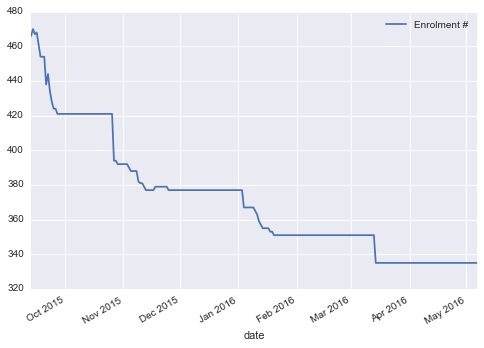

In [22]:
# Plotting using the DataFrame
math_course.plot(x='date', y='Enrolment #')

In [ ]:
# This isn't too accurate.
# The reason for the sudden drops is because the enrolment numbers in the university website was not updated daily.

# A more appropriate use of the data is comparing all courses at a particular time

In [23]:
# Lets fine the drop rates for Fall and Spring courses
sept_enrolment = grouped_df.loc[grouped_df['date'] == datetime(2015, 9, 27)].reset_index(drop=True)
jan_enrolment = grouped_df.loc[grouped_df['date'] == datetime(2016, 1, 24)].reset_index(drop=True)
may_enrolment = grouped_df.loc[grouped_df['date'] == datetime(2016, 5, 6)].reset_index(drop=True)

fall_drop_rate = (sept_enrolment['Enrolment #'] - jan_enrolment['Enrolment #']) / sept_enrolment['Enrolment Caps']
jan_drop_rate = (jan_enrolment['Enrolment #'] - may_enrolment['Enrolment #']) / jan_enrolment['Enrolment Caps']

drop_df = may_enrolment.drop(['date', 'WaitList #', 'Enrolment #'], axis=1)
drop_df['fall_drop_rate'] = fall_drop_rate
drop_df['spring_drop_rate'] = jan_drop_rate
drop_df.head()

,Course,Section Code,dept,Enrolment Caps,fall_drop_rate,spring_drop_rate
0,ABP100Y1,Y,ABP,50.0,0.020000,0.060000
1,ABS201Y1,Y,ABS,300.0,0.136667,0.013333
2,ABS205H1,S,ABS,60.0,-0.266667,0.266667
3,ABS210Y1,Y,ABS,60.0,0.166667,0.000000
4,ABS220Y1,Y,ABS,30.0,0.000000,0.000000


In [ ]:
# It doesn't make sense for there to be a value for spring courses in Fall column and Fall courses in Spring column.
# Since I didn't remove them, I will exclude them in the graph.

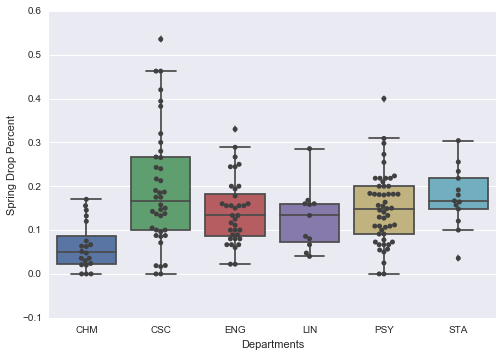

In [24]:
# Graphing the drop rate for a particular term for specified departments
depts = ['CSC', 'PSY', 'LIN', 'STA', 'ENG', 'CHM']
term = 'S'
y_axis = 'spring_drop_rate'
drop_df = drop_df.loc[drop_df['Section Code'] == term]
drop_df = drop_df[drop_df['dept'].isin(depts)]
ax = sns.boxplot(x="dept", y=y_axis, data=drop_df)
ax = sns.swarmplot(x="dept", y=y_axis, data=drop_df, color='.25')
ax.set(xlabel='Departments', ylabel='Spring Drop Percent')
ax

In [25]:
# Finding Waitlists for different departments for Fall and Spring terms. 
fall_df = grouped_df.loc[grouped_df['date'] == datetime(2015, 9, 14)].reset_index(drop=True)
winter_df = grouped_df.loc[grouped_df['date'] == datetime(2016, 1, 1)].reset_index(drop=True)

waitlist_df = winter_df.drop(['date', 'WaitList #', 'Enrolment #'], axis=1)
waitlist_df['Fall WaitList'] = fall_df['WaitList #'] / fall_df['Enrolment Caps']
waitlist_df['Spring WaitList'] = winter_df['WaitList #'] / winter_df['Enrolment Caps']
waitlist_df.head()

,Course,Section Code,dept,Enrolment Caps,Fall WaitList,Spring WaitList
0,ABP100Y1,Y,ABP,50.0,0.0,0.000000
1,ABS201Y1,Y,ABS,300.0,0.0,0.000000
2,ABS205H1,S,ABS,60.0,0.0,0.133333
3,ABS210Y1,Y,ABS,60.0,0.0,0.000000
4,ABS220Y1,Y,ABS,30.0,0.0,0.000000


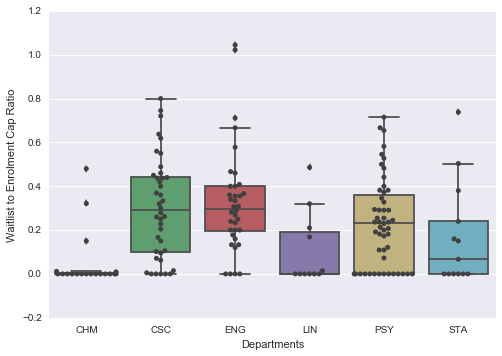

In [26]:
# Graphing the WaitLists for a particular term for specified departments
depts = ['CSC', 'PSY', 'LIN', 'STA', 'ENG', 'CHM']
term = 'S'
y_axis = 'Spring WaitList'
waitlist_df = waitlist_df.loc[waitlist_df['Section Code'] == term]
waitlist_df = waitlist_df[waitlist_df['dept'].isin(depts)]
ax = sns.boxplot(x="dept", y=y_axis, data=waitlist_df)
ax = sns.swarmplot(x="dept", y=y_axis, data=waitlist_df, color='.25')
ax.set(xlabel='Departments', ylabel='Waitlist to Enrolment Cap Ratio')
ax